# Setup

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

import os

from sqlalchemy import create_engine

pd.set_option('display.float_format', '{:.2f}'.format)

# Variaveis de ambiente
host = os.getenv("MYSQL_HOST")
user = os.getenv("MYSQL_USER")
password = os.getenv("MYSQL_PASSWORD")
database = os.getenv("MYSQL_DB")
port = os.getenv("MYSQL_PORT")

### Funções

In [ ]:
# Describe geral
# Mostra informações essenciais das tabelas:
# NaNs, Apps unicos, Shape, Range de datas, dtypes, describe

def describe_geral(df, nome):
    valores_na = df.isna().sum()
    apps_unicos = len(df.appid.unique())
    shape = df.shape

    print("=================="*4)
    print(f"Tabela: {nome}")
    print(f"Valores NaN:\n{valores_na}\n")
    print(f"Apps unicos: {apps_unicos}")
    print(f"Shape: {shape}")
    print(f"Data maxima: {df.date.max()}")
    print(f"Data minima: {df.date.min()}")
    print(f"\nDTypes:\n{df.dtypes}")
    display(df.describe().T.drop('date'))

# Preenche os valores nulos pela mediana de cada app
def preencher_com_mediana(df, colunas):
    df_temp = df.copy()

    for coluna in colunas:
        df_temp[coluna] = df_temp.groupby('appid')[coluna].transform(lambda x: x.fillna(round(x.dropna().median())))

    return df_temp

### Carrega (primeira run)
Lê os dados do MySQL e salva na base local

In [ ]:
# Cria a engine
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}')

# Mostra as tabelas
with engine.connect() as conn:
    tables = pd.read_sql("SHOW TABLES;", conn)
    print(tables)

  Tables_in_case_data_scientist
0                        daumau
1                desinstalacoes
2                      installs
3               ratings_reviews


In [190]:
# Seleciona tabelas essenciais
keep_tables = tables['Tables_in_case_data_scientist']

# Leitura de dados
raw_data = {}

for table in keep_tables:
    print(f"Lendo tabela: {table}")
    raw_data[table] = pd.read_sql(f"SELECT * FROM {table} LIMIT 100000;", con=engine)
    raw_data[table].to_csv(f"../data/raw/{table}_raw.csv", index=False)

Lendo tabela: daumau
Lendo tabela: desinstalacoes
Lendo tabela: installs
Lendo tabela: ratings_reviews


### Carrega (outras runs)
Lê os dados locais

In [324]:
tables = ['daumau', 'desinstalacoes', 'installs', 'ratings_reviews']

# Leitura de dados
raw_data = {}

for table in tables:
    print(f"Lendo tabela: {table}")
    raw_data[table] = pd.read_csv(f"../data/raw/{table}_raw.csv").convert_dtypes()
    raw_data[table].columns = raw_data[table].columns.str.lower()
    raw_data[table]["date"] = pd.to_datetime(raw_data[table]["date"]).dt.floor("D")

Lendo tabela: daumau
Lendo tabela: desinstalacoes
Lendo tabela: installs
Lendo tabela: ratings_reviews


### Describe geral
-  Descrição geral dos dados com: NaNs, range de datas, dtypes, describe()

In [325]:
for nome_df in tables:
    describe_geral(raw_data[nome_df], nome_df)

Tabela: daumau
Valores NaN:
appid       28
date         0
daureal    194
maureal     20
dtype: int64

Apps unicos: 196
Shape: (41299, 4)
Data maxima: 2220-07-31 00:00:00
Data minima: 1912-02-01 00:00:00

DTypes:
appid      string[python]
date       datetime64[ns]
daureal             Int64
maureal             Int64
dtype: object


,count,mean,min,25%,50%,75%,max,std
daureal,41105.00,440147.21,750.00,8661.00,31037.00,162982.00,10648152.00,1336407.18
maureal,41279.00,1912598.66,750.00,78105.00,231074.00,856236.00,29605840.00,4786170.50


Tabela: desinstalacoes
Valores NaN:
appid             0
date              0
country           0
lang              0
predictionloss    0
dtype: int64

Apps unicos: 195
Shape: (53188, 5)
Data maxima: 2024-10-07 00:00:00
Data minima: 2024-01-01 00:00:00

DTypes:
appid             string[python]
date              datetime64[ns]
country           string[python]
lang              string[python]
predictionloss             Int64
dtype: object


,count,mean,min,25%,50%,75%,max,std
predictionloss,53188.00,11960.17,331.00,1760.00,3275.50,8728.00,189683.00,23733.22


Tabela: installs
Valores NaN:
appid          0
date           0
newinstalls    0
dtype: int64

Apps unicos: 182
Shape: (48150, 3)
Data maxima: 2024-10-09 00:00:00
Data minima: 2024-01-01 00:00:00

DTypes:
appid          string[python]
date           datetime64[ns]
newinstalls             Int64
dtype: object


,count,mean,min,25%,50%,75%,max,std
newinstalls,48150.00,4116.13,0.00,255.00,865.50,2969.00,73886.00,8873.38


Tabela: ratings_reviews
Valores NaN:
date             0
appid            0
category         0
ratings          0
daily_ratings    0
reviews          0
daily_reviews    0
dtype: int64

Apps unicos: 182
Shape: (47155, 7)
Data maxima: 2024-09-30 00:00:00
Data minima: 2024-01-01 00:00:00

DTypes:
date             datetime64[ns]
appid            string[python]
category         string[python]
ratings                   Int64
daily_ratings             Int64
reviews                   Int64
daily_reviews             Int64
dtype: object


,count,mean,min,25%,50%,75%,max,std
ratings,47155.00,365547.03,10.00,8400.00,43922.00,204409.50,13236224.00,1231672.94
daily_ratings,47155.00,149.26,-711.00,2.00,12.00,74.00,34180.00,591.01
reviews,47155.00,94281.67,4.00,2572.00,13470.00,50277.00,1491128.00,234839.92
daily_reviews,47155.00,21.65,-75.00,0.00,3.00,12.00,2290.00,68.89


# Limpeza
- Tratamento dos dados: dados irrelevantes ou errados
- Tratamento de NaNs será realizado depois de todos os joins

### DAUMAU
Problemas: 
- Datas erradas
- Valores NaN

In [326]:
df_temp = raw_data['daumau'].copy()

In [327]:
# Problema das datas

# Filtra apenas datas erradas
df_temp = df_temp[~((df_temp["date"] >= pd.to_datetime("2024-01-01")) 
                    & (df_temp["date"] <= pd.to_datetime("2024-12-31")))]
test_appids = df_temp[~df_temp['appid'].isna()].head(5)
display(test_appids)

# Apps com data errada possuem apenas 1 amostra na base
# Sugere que não apenas as datas estão erradas, mas toda a linha
for test_id in test_appids.appid:
    len_test = len(df_temp[df_temp['appid'] == test_id])
    print(len_test)

# Remover linhas com datas erradas.
raw_data['daumau'] = raw_data['daumau'][(raw_data['daumau']["date"] >= pd.to_datetime("2024-01-01")) 
                                     & (raw_data['daumau']["date"] <= pd.to_datetime("2024-12-31"))]

,appid,date,daureal,maureal
41198,com.app.26790,1980-07-01,1936,33995
41199,com.app.18251,1980-07-02,74810,308395
41200,com.app.96361,1980-07-03,859,6538
41201,com.app.99432,1980-07-04,1152801,2988638
41202,com.app.23305,1980-07-05,5963197,27521859


1
1
1
1
1


In [328]:
# Problema dos NaNs (resolvidoi após o join)

# Filtra apenas numeros faltantes
df_temp = raw_data['daumau'].copy()
print(df_temp.isna().sum())
df_temp_dau = df_temp[df_temp['daureal'].isna()]
df_temp_mau = df_temp[df_temp['maureal'].isna()]

# Separa dau e mau e analisa nans por app
nans_por_app_dau = df_temp_dau.fillna(1).groupby('appid',as_index=False)['daureal'].sum()
nans_por_app_mau = df_temp_mau.fillna(1).groupby('appid',as_index=False)['maureal'].sum()
print("\nNans por app dau")
display(nans_por_app_dau)

print("Nans por app mau")
display(nans_por_app_mau)

# Maureal está nan, mas daureal tem numeros altos (ultimos 30 dias)
# Indica que maureal não é 0
# Por ser poucos valores (<1%), ainda não vale a pena remover

print("head() das dfs filtradas com NaN")
display(df_temp_mau.head(3))

# Daureal também possui poucos valores NaN. cada app perderia em média menos de 1 mês
# Ainda não vale a pena remover

display(df_temp_dau.head(3))

appid        0
date         0
daureal    194
maureal     20
dtype: int64

Nans por app dau


,appid,daureal
0,com.app.13071,47
1,com.app.14360,19
2,com.app.20651,21
3,com.app.32607,5
4,com.app.79907,21
5,com.app.81778,10
6,com.app.84679,47
7,com.app.91205,24


Nans por app mau


,appid,maureal
0,com.app.90128,20


head() das dfs filtradas com NaN


,appid,date,daureal,maureal
4989,com.app.90128,2024-01-12,37330,<NA>
4990,com.app.90128,2024-01-13,41617,<NA>
4991,com.app.90128,2024-01-14,44214,<NA>


,appid,date,daureal,maureal
3038,com.app.20651,2024-01-02,<NA>,2266
3039,com.app.20651,2024-01-04,<NA>,2234
3040,com.app.20651,2024-01-05,<NA>,2326


### Installs + Desinstalações
- Os dados não apresentam nenhuma inconsistência incialmente
- Realizar join de installs e desinstalações
- Inconsistência de valores nulos apareceu depois do join

In [329]:
# Merge
raw_data['app_data'] = raw_data['installs'].merge(raw_data['desinstalacoes'], on=['appid','date'], how='outer')

# Drop colunas irrelevantes
raw_data['app_data'].drop(['lang','country'], axis=1, inplace=True)

# Tamanho
print(f"Len: {len(raw_data['app_data'])}")

# Valores NA após o join
df_temp = raw_data['app_data'].copy()

# Resultado
raw_data['app_data'] = df_temp.copy()
df_temp.isna().sum()

Len: 53701


appid                0
date                 0
newinstalls       5551
predictionloss     342
dtype: int64

### Rating reviews
- Nenhuma inconsistência inicial
- Valores de daily ratings e daily reviews negativos podem ser remoções ou bugs, por enquanto mantemos

In [330]:
raw_data['ratings_reviews']

,date,appid,category,ratings,daily_ratings,reviews,daily_reviews
0,2024-01-01,com.app.40009,OTHERS,63500,5,25251,0
1,2024-01-01,com.app.88516,OTHERS,2440,0,312,0
2,2024-01-01,com.app.64634,TRAVEL_AND_LOCAL,536,0,331,0
3,2024-01-01,com.app.78470,SHOPPING,97924,7,27241,23
4,2024-01-01,com.app.36433,FINANCE,678,0,414,0
...,...,...,...,...,...,...,...
47150,2024-09-30,com.app.14509,FINANCE,1426039,452,618170,108
47151,2024-09-30,com.app.18711,BUSINESS,63943,28,16929,14
47152,2024-09-30,com.app.14811,FINANCE,8863,2,4938,2
47153,2024-09-30,com.app.20103,FINANCE,1542,0,1152,0


# União das tabelas

In [598]:
# Merge
final_df = raw_data['app_data'].merge(raw_data['daumau'], on=['appid','date'], how='outer').copy()
final_df = final_df.merge(raw_data['ratings_reviews'], on=['appid','date'], how='outer')

# Drop duplicates
final_df.drop_duplicates(inplace=True)

### Tratamento dos NaNs - remoção de apps
- Filtra apps não desejáveis para o treinamento

In [599]:
# Valores nulos em cada coluna
print(f"Len pré filtro: {len(final_df)}")
final_df.isna().sum()

Len pré filtro: 53657


appid                 0
date                  0
newinstalls        5678
predictionloss      469
daureal           12806
maureal           12632
category           6502
ratings            6502
daily_ratings      6502
reviews            6502
daily_reviews      6502
dtype: int64

In [600]:
# Agrupamento por app para ver NaNs por linhas
nan_counts = final_df.groupby('appid', as_index=False).agg(
    total_count=('newinstalls', 'size'),
    newinstalls_nan=('newinstalls', lambda x: x.isna().sum()),
    predictionloss_nan=('predictionloss', lambda x: x.isna().sum()),
    daureal_nan=('daureal', lambda x: x.isna().sum()),
    maureal_nan=('maureal', lambda x: x.isna().sum()),
    ratings_nan=('ratings', lambda x: x.isna().sum()),
    daily_ratings_nan=('daily_ratings', lambda x: x.isna().sum()),
    reviews_nan=('reviews', lambda x: x.isna().sum()),
    daily_reviews_nan=('daily_reviews', lambda x: x.isna().sum())
)

# Numero maximo de nans que uma coluna tem
nan_cols = [x for x in nan_counts.columns if x not in ['appid','total_count','max_nans','nan_perc','nans_sum']]
nan_counts['max_nans'] = nan_counts[nan_cols].max(axis=1)
nan_counts['sum_nans'] = nan_counts[nan_cols].sum(axis=1)

# Porcentagem das linhas que possuem NaN
nan_counts['nan_perc'] = nan_counts['max_nans'] / nan_counts['total_count']
nan_counts['daureal_perc'] = nan_counts['maureal_nan'] / nan_counts['total_count']

<Axes: >

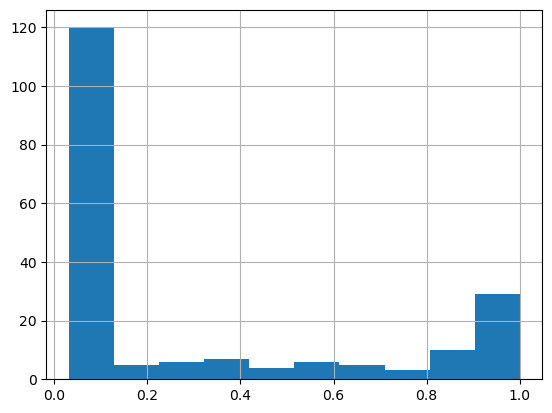

In [601]:
# Distribuição de porcentagem de NaNs por app (antes do filtro)
nan_counts['nan_perc'].hist()

In [602]:
# Filtro de NaNs

len_data_cols = len(nan_cols) # Numero de colunas features
threshold = 0.3 # Quanto % dessas colunas podem ser nulas

# Retira apps com mais de 30% de NaNs no target
nan_counts = nan_counts[nan_counts['daureal_perc']<0.3]

# Gera uma métrica threshold que considera numero de nans e colunas
# O objetivo é retirar apps com muitas colunas inconsistentes
nan_counts['sum_nans_threshold'] = len_data_cols * nan_counts['total_count'] * threshold

# Faz o filtro do threshold
nan_counts = nan_counts[nan_counts['sum_nans'] < nan_counts['sum_nans_threshold']]

# Filtro dos apps restantes
apps_filtro = nan_counts['appid'].unique()

<Axes: >

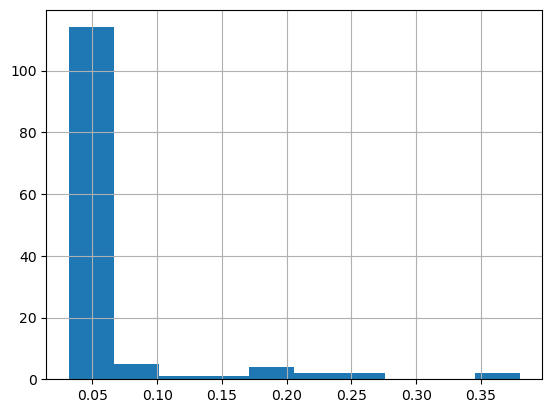

In [603]:
# Distribuição de porcentagem de NaNs por app (após filtro)
nan_counts['nan_perc'].hist()

### Tratamento de NaNs - Tabela de features
- Tratamentos direto na tabela final

In [618]:
print(f"Len pré filtro: {len(final_df)}")

# Filtra os apps selecionados anteriormente
filtered_df = final_df[final_df['appid'].isin(apps_filtro)].reset_index(drop=True).copy()

# Se 4 colunas forem NaN, remove a linha
filtered_df = filtered_df[filtered_df.isna().sum(axis=1) < 4].copy()

print(f"Nova len: {len(filtered_df)}")

Len pré filtro: 53657
Nova len: 35383


In [633]:
# Preenchimento dos valores de NaN com a mediana de cada app
colunas_numericas = ['newinstalls','predictionloss','daureal','maureal','ratings','daily_ratings','reviews','daily_reviews']

fill_df = preencher_com_mediana(filtered_df, colunas_numericas)

In [634]:
fill_df.head()

,appid,date,newinstalls,predictionloss,daureal,maureal,category,ratings,daily_ratings,reviews,daily_reviews
0,com.app.86367,2024-01-01,1968,2438,89883,660867,FINANCE,41891,28,18151,37
1,com.app.18711,2024-01-01,1364,2184,78810,422698,BUSINESS,56121,4,14906,3
2,com.app.36257,2024-01-01,7511,8388,475571,1974569,BUSINESS,97211,12,56560,26
3,com.app.88509,2024-01-01,53137,27530,4094009,24681884,OTHERS,961533,365,496734,157
4,com.app.93131,2024-01-01,137,1785,12443,33407,BUSINESS,2958,1,1241,1


# Salva na base

In [635]:
fill_df.to_csv("../data/base_tratada.csv",index=False)